In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import pytz
from pytz import common_timezones, all_timezones
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline
from datetime import datetime
import scipy as sp
import statsmodels.api as sm
import statsmodels.formula.api as smf
matplotlib.style.use('fivethirtyeight')
matplotlib.style.use('seaborn-talk')
import os
import collections

preDouble = "\\\\iobsdc01\\SharedDocs\\SEER_MEDICARE\\SEER_MEDICARE_STAGING"
new = os.chdir(preDouble)
#print(preDouble)

In [2]:
import pickle
fileObject = open('control_indicies.pickle', 'rb')
b = pickle.load(fileObject)
fileObject.close()
controlindices = list(b)

In [3]:
import pickle
fileObject = open('treatment_indicies.pickle', 'rb')
b = pickle.load(fileObject)
fileObject.close()
treatmentindices = list(b)


In [4]:
import pickle
fileObject = open('pure_control_indicies.pickle', 'rb')
b = pickle.load(fileObject)
fileObject.close()
purecontrolindices = list(b)

In [5]:
import pickle
fileObject = open('pure_treatment_indicies.pickle', 'rb')
b = pickle.load(fileObject)
fileObject.close()
puretreatmentindices = list(b)

In [6]:
df = pd.read_pickle('dfpedsfFirsts.pickle')

In [7]:
mask = (df['srvm1'] != 9999)
dfall = df[mask]

In [8]:
geomask = (dfall['elevation_1'] != dfall['FIPScombo_1']) 

dfall = dfall[geomask].copy()

In [9]:
dfall['elevation_1'].replace('99999',np.nan,inplace=True)
dfall['elevation_2'].replace('99999',np.nan,inplace=True)
dfall['elevation_3'].replace('99999',np.nan,inplace=True)

dfall['lat_1'].replace('99999',np.nan,inplace=True)
dfall['lat_2'].replace('99999',np.nan,inplace=True)
dfall['lat_3'].replace('99999',np.nan,inplace=True)

dfall['lng_1'].replace('99999',np.nan,inplace=True)
dfall['lng_2'].replace('99999',np.nan,inplace=True)
dfall['lng_3'].replace('99999',np.nan,inplace=True)

dfall['elevation_1'] = dfall['elevation_1'].astype('float')
dfall['elevation_2'] = dfall['elevation_2'].astype('float')
dfall['elevation_3'] = dfall['elevation_3'].astype('float')

dfall['lat_1'] = dfall['lat_1'].astype('float')
dfall['lat_2'] = dfall['lat_2'].astype('float')
dfall['lat_3'] = dfall['lat_3'].astype('float')

dfall['lng_1'] = dfall['lng_1'].astype('float')
dfall['lng_2'] = dfall['lng_2'].astype('float')
dfall['lng_3'] = dfall['lng_3'].astype('float')

In [10]:
dfall.set_index('patient_id', inplace=True,drop=False)

In [11]:
dfall.patient_id.isin(treatmentindices).sum(), dfall.patient_id.isin(controlindices).sum()

(916, 916)

In [12]:
dfall.patient_id.isin(puretreatmentindices).sum(), dfall.patient_id.isin(purecontrolindices).sum()

(831, 831)

In [13]:
dfalltreatment = dfall.loc[treatmentindices].copy()
dfallcontrol = dfall.loc[controlindices].copy()
dfallpuretreatment = dfall.loc[puretreatmentindices].copy()
dfallpurecontrol = dfall.loc[purecontrolindices].copy()

In [14]:
prostate_filter_all = dfall.site1.str.contains('prostate',case=False,na=False) | \
              dfall.site1.str.contains('prostate',case=False,na=False)
    
prostate_filter_treatment = dfalltreatment.site1.str.contains('prostate',case=False,na=False) | \
              dfalltreatment.site1.str.contains('prostate',case=False,na=False)
    
prostate_filter_control = dfallcontrol.site1.str.contains('prostate',case=False,na=False) | \
              dfallcontrol.site1.str.contains('prostate',case=False,na=False)
    
    
prostate_filter_pure_treatment = dfallpuretreatment.site1.str.contains('prostate',case=False,na=False) | \
              dfallpuretreatment.site1.str.contains('prostate',case=False,na=False)
    
prostate_filter_pure_control = dfallpurecontrol.site1.str.contains('prostate',case=False,na=False) | \
              dfallpurecontrol.site1.str.contains('prostate',case=False,na=False)

    
lung_filter_treatment = dfalltreatment.site1.str.contains('lung',case=False,na=False) | \
              dfalltreatment.site1.str.contains('bronchus',case=False,na=False)
    
lung_filter_control = dfallcontrol.site1.str.contains('lung',case=False,na=False) | \
              dfallcontrol.site1.str.contains('bronchus',case=False,na=False)
    
    
    
lung_filter_all = dfall.site1.str.contains('lung',case=False,na=False) | \
              dfall.site1.str.contains('bronchus',case=False,na=False)
    
lung_filter_pure_treatment = dfallpuretreatment.site1.str.contains('lung',case=False,na=False) | \
              dfallpuretreatment.site1.str.contains('bronchus',case=False,na=False)
    
lung_filter_pure_control = dfallpurecontrol.site1.str.contains('lung',case=False,na=False) | \
              dfallpurecontrol.site1.str.contains('bronchus',case=False,na=False)
    

In [15]:
catcols = ['m_sex','marst1','srace','nhiade','grade1',
           'site1',
          'histrec1',
           'modx1','stat_rec']


goodcols = ['m_sex','marst1', 'srace','nhiade',
           'grade1','site1',
           'lat1','histrec1',
           'modx1','stat_rec','birthyr',
           'agedx1',
           'yrdx1','elevation_1',
           'lng_1']

In [16]:
resgoodcontrol = pd.concat([pd.get_dummies(dfallcontrol[col],prefix=col) for col in catcols], axis=1)

resgoodtreatment = pd.concat([pd.get_dummies(dfalltreatment[col],prefix=col) for col in catcols], axis=1)

resgoodpop = pd.concat([pd.get_dummies(dfall[col],prefix=col) for col in catcols], axis=1)

In [17]:
resgoodpurecontrol = pd.concat([pd.get_dummies(dfallpurecontrol[col],prefix=col) for col in catcols], axis=1)

resgoodpuretreatment = pd.concat([pd.get_dummies(dfallpuretreatment[col],prefix=col) for col in catcols], axis=1)

resgoodpurepop = pd.concat([pd.get_dummies(dfall[col],prefix=col) for col in catcols], axis=1)

In [18]:
resgoodcontrol['birthyr'] = dfallcontrol['birthyr']
resgoodcontrol['agedx1'] = dfallcontrol['agedx1']

resgoodcontrol['yrdx1'] = dfallcontrol['yrdx1']

resgoodcontrol['lat_1'] = dfallcontrol['lat_1']

resgoodcontrol['lng_1'] = dfallcontrol['lng_1']

resgoodcontrol['srvm1'] = dfallcontrol['srvm1']

resgoodcontrol['elevation_1'] = dfallcontrol['elevation_1']

In [19]:
resgoodpurecontrol['birthyr'] = dfallpurecontrol['birthyr']
resgoodpurecontrol['agedx1'] = dfallpurecontrol['agedx1']

resgoodpurecontrol['yrdx1'] = dfallpurecontrol['yrdx1']

resgoodpurecontrol['lat_1'] = dfallpurecontrol['lat_1']

resgoodpurecontrol['lng_1'] = dfallpurecontrol['lng_1']

resgoodpurecontrol['srvm1'] = dfallpurecontrol['srvm1']

resgoodpurecontrol['elevation_1'] = dfallpurecontrol['elevation_1']

In [20]:
resgoodtreatment['birthyr'] = dfalltreatment['birthyr']
resgoodtreatment['agedx1'] = dfalltreatment['agedx1']

resgoodtreatment['yrdx1'] = dfalltreatment['yrdx1']



resgoodtreatment['lat_1'] = dfalltreatment['lat_1']

resgoodtreatment['lng_1'] = dfalltreatment['lng_1']

resgoodtreatment['srvm1'] = dfalltreatment['srvm1']

resgoodtreatment['elevation_1'] = dfalltreatment['elevation_1']

In [21]:
resgoodpuretreatment['birthyr'] = dfallpuretreatment['birthyr']
resgoodpuretreatment['agedx1'] = dfallpuretreatment['agedx1']

resgoodpuretreatment['yrdx1'] = dfallpuretreatment['yrdx1']



resgoodpuretreatment['lat_1'] = dfallpuretreatment['lat_1']

resgoodpuretreatment['lng_1'] = dfallpuretreatment['lng_1']

resgoodpuretreatment['srvm1'] = dfallpuretreatment['srvm1']

resgoodpuretreatment['elevation_1'] = dfallpuretreatment['elevation_1']

In [22]:
resgoodpop['birthyr'] = dfall['birthyr']
resgoodpop['agedx1'] = dfall['agedx1']

resgoodpop['yrdx1'] = dfall['yrdx1']




resgoodpop['lat_1'] = dfall['lat_1']

resgoodpop['lng_1'] = dfall['lng_1']

resgoodpop['srvm1'] = dfall['srvm1']

resgoodpop['elevation_1'] = dfall['elevation_1']

In [23]:
beamfilter = dfall.rad1.str.contains('beam radiation',case=False,na=False)

# <font color="#E56717">Kaplan-Meier Survival Curves</font>

# <font color="#E56717">Kaplan-Meier Survival Curves afer performing the patient matching</font>

# <font color="#E56717">Prostate Cancer</font>

In [24]:
from lifelines import KaplanMeierFitter

kmfpop = KaplanMeierFitter()
kmfcontrol = KaplanMeierFitter()
kmftreatment = KaplanMeierFitter()
kmfpurecontrol = KaplanMeierFitter()
kmfpuretreatment = KaplanMeierFitter()

Tcontrol = resgoodcontrol[prostate_filter_control]["srvm1"]
Econtrol = resgoodcontrol[prostate_filter_control]["stat_rec_Dead"]

Tpurecontrol = resgoodpurecontrol[prostate_filter_pure_control]["srvm1"]
Epurecontrol = resgoodpurecontrol[prostate_filter_pure_control]["stat_rec_Dead"]

Ttreatment = resgoodtreatment[prostate_filter_treatment]["srvm1"]
Etreatment = resgoodtreatment[prostate_filter_treatment]["stat_rec_Dead"]

Tpuretreatment = resgoodpuretreatment[prostate_filter_pure_treatment]["srvm1"]
Epuretreatment = resgoodpuretreatment[prostate_filter_pure_treatment]["stat_rec_Dead"]

Tpop = resgoodpop[prostate_filter_all & beamfilter]["srvm1"]
Epop = resgoodpop[prostate_filter_all & beamfilter]["stat_rec_Dead"]

kmfpop.fit(Tpop, event_observed=Epop,label='All Prostate Cancer (all beam radiation treatment modalities) group');
kmfcontrol.fit(Tcontrol, event_observed=Econtrol,label='Non PBT group (control group)')
kmftreatment.fit(Ttreatment, event_observed=Etreatment, label='PBT group (treatment group)')

kmfpurecontrol.fit(Tpurecontrol, event_observed=Epurecontrol,label='All IMRT group (control group)')
kmfpuretreatment.fit(Tpuretreatment, event_observed=Epuretreatment, label='pure PBT group (treatment group; no IMRT)')


<lifelines.KaplanMeierFitter: fitted with 806 observations, 760 censored>

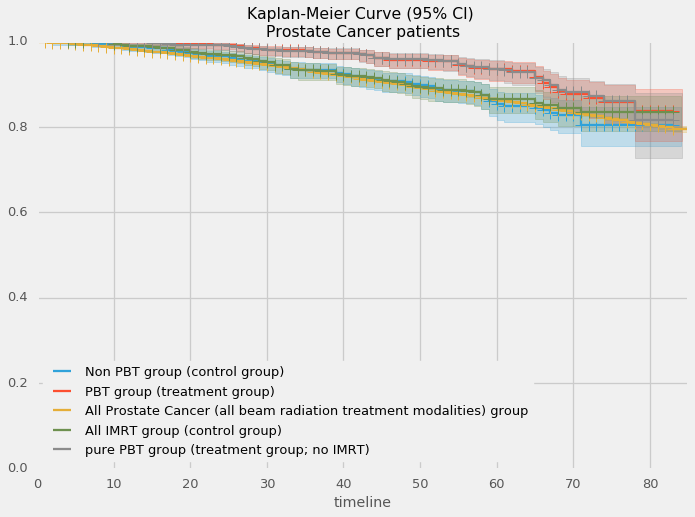

In [25]:
ax = kmfcontrol.plot(show_censors=True)
kmftreatment.plot(ax=ax, show_censors=True)
kmfpop.plot(ax=ax, show_censors=True)
kmfpurecontrol.plot(show_censors=True, ax=ax)
kmfpuretreatment.plot(show_censors=True,ax=ax)
plt.title("Kaplan-Meier Curve (95% CI) \nProstate Cancer patients");
plt.xlim(0,85)
plt.savefig('prostate_pure_km.pdf')

# <font color="#E56717">Significance test for the pure IMRT - pure PBT matched groups</font>

In [26]:
from lifelines.statistics import logrank_test
results = logrank_test(Tpuretreatment, Tpurecontrol, Epuretreatment, Epurecontrol)
results.print_summary()

Results
   alpha: 0.95
   null distribution: chi squared
   test: logrank
   df: 1
   t 0: -1

   __ p-value ___|__ test statistic __|____ test result ____|__ is significant __
         0.00260 |              9.070 |      Reject Null    |        True       


# <font color="#E56717">Significance test for the control - treatment matched groups</font>

In [27]:
from lifelines.statistics import logrank_test
results = logrank_test(Ttreatment, Tcontrol, Etreatment, Econtrol)
results.print_summary()

Results
   alpha: 0.95
   null distribution: chi squared
   test: logrank
   df: 1
   t 0: -1

   __ p-value ___|__ test statistic __|____ test result ____|__ is significant __
         0.00017 |             14.151 |      Reject Null    |        True       


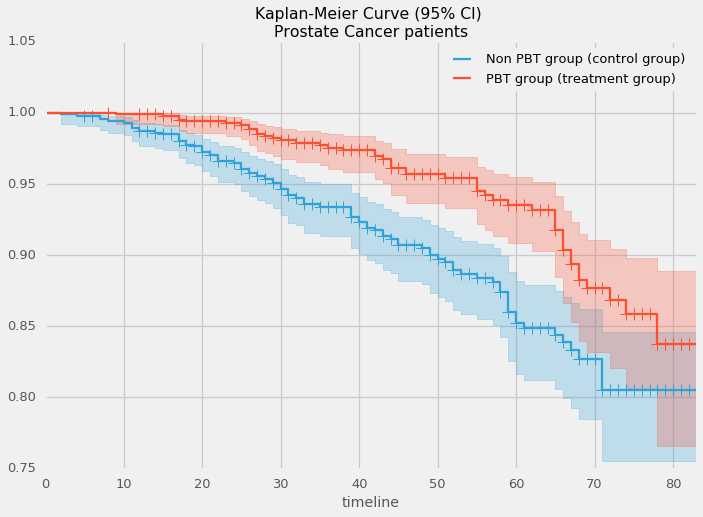

In [28]:
ax = kmfcontrol.plot(show_censors=True)
kmftreatment.plot(ax=ax, show_censors=True)
#kmfpop.plot(ax=ax, show_censors=True)
plt.title("Kaplan-Meier Curve (95% CI) \nProstate Cancer patients");
plt.savefig('prostatekm.pdf')

In [29]:
from lifelines.statistics import logrank_test
results = logrank_test(Ttreatment, Tcontrol, Etreatment, Econtrol)
results.print_summary()

Results
   alpha: 0.95
   null distribution: chi squared
   test: logrank
   df: 1
   t 0: -1

   __ p-value ___|__ test statistic __|____ test result ____|__ is significant __
         0.00017 |             14.151 |      Reject Null    |        True       


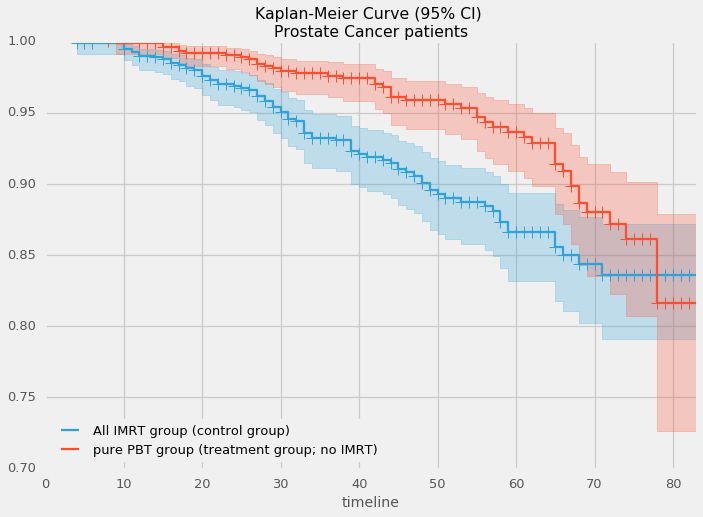

In [30]:
ax = kmfpurecontrol.plot(show_censors=True)
kmfpuretreatment.plot(ax=ax, show_censors=True)
#kmfpop.plot(ax=ax, show_censors=True)
plt.title("Kaplan-Meier Curve (95% CI) \nProstate Cancer patients");
plt.savefig('prostatekm_pure.pdf')

In [31]:
from lifelines.statistics import logrank_test
results = logrank_test(Tpuretreatment, Tpurecontrol, Epuretreatment, Epurecontrol)
results.print_summary()

Results
   alpha: 0.95
   null distribution: chi squared
   test: logrank
   df: 1
   t 0: -1

   __ p-value ___|__ test statistic __|____ test result ____|__ is significant __
         0.00260 |              9.070 |      Reject Null    |        True       


# <font color="#E56717">Lung Cancer</font>

In [32]:
from lifelines import KaplanMeierFitter

kmfpop = KaplanMeierFitter()
kmfcontrol = KaplanMeierFitter()
kmftreatment = KaplanMeierFitter()
kmfpurecontrol = KaplanMeierFitter()
kmfpuretreatment = KaplanMeierFitter()

Tcontrol = resgoodcontrol[lung_filter_control]["srvm1"]
Econtrol = resgoodcontrol[lung_filter_control]["stat_rec_Dead"]

Tpurecontrol = resgoodpurecontrol[lung_filter_pure_control]["srvm1"]
Epurecontrol = resgoodpurecontrol[lung_filter_pure_control]["stat_rec_Dead"]

Ttreatment = resgoodtreatment[lung_filter_treatment]["srvm1"]
Etreatment = resgoodtreatment[lung_filter_treatment]["stat_rec_Dead"]

Tpuretreatment = resgoodpuretreatment[lung_filter_pure_treatment]["srvm1"]
Epuretreatment = resgoodpuretreatment[lung_filter_pure_treatment]["stat_rec_Dead"]

Tpop = resgoodpop[lung_filter_all & beamfilter]["srvm1"]
Epop = resgoodpop[lung_filter_all & beamfilter]["stat_rec_Dead"]

kmfpop.fit(Tpop, event_observed=Epop,label='All Lung Cancer (all beam radiation treatment modalities) group');
kmfcontrol.fit(Tcontrol, event_observed=Econtrol,label='Non PBT group (control group)')
kmftreatment.fit(Ttreatment, event_observed=Etreatment, label='PBT group (treatment group)')

kmfpurecontrol.fit(Tpurecontrol, event_observed=Epurecontrol,label='All IMRT group (control group)')
kmfpuretreatment.fit(Tpuretreatment, event_observed=Epuretreatment, label='pure PBT group (treatment group; no IMRT)')
    

<lifelines.KaplanMeierFitter: fitted with 12 observations, 6 censored>

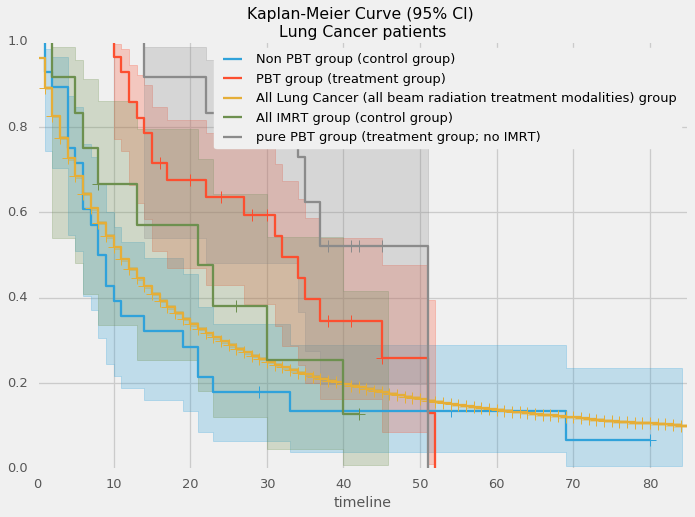

In [33]:
ax = kmfcontrol.plot(show_censors=True)
kmftreatment.plot(ax=ax, show_censors=True)
kmfpop.plot(ax=ax, show_censors=True)
kmfpurecontrol.plot(show_censors=True, ax=ax)
kmfpuretreatment.plot(show_censors=True,ax=ax)
plt.title("Kaplan-Meier Curve (95% CI) \nLung Cancer patients");
plt.xlim(0,85)
plt.savefig('lung_pure_km.pdf')

# <font color="#E56717">Significance test for the pure IMRT - pure PBT matched groups</font>

In [34]:
from lifelines.statistics import logrank_test
results = logrank_test(Tpuretreatment, Tpurecontrol, Epuretreatment, Epurecontrol)
results.print_summary()

Results
   alpha: 0.95
   null distribution: chi squared
   test: logrank
   df: 1
   t 0: -1

   __ p-value ___|__ test statistic __|____ test result ____|__ is significant __
         0.01650 |              5.749 |      Reject Null    |        True       


# <font color="#E56717">Significance test for the control - treatment matched groups</font>

In [35]:
from lifelines.statistics import logrank_test
results = logrank_test(Ttreatment, Tcontrol, Etreatment, Econtrol)
results.print_summary()

Results
   alpha: 0.95
   null distribution: chi squared
   test: logrank
   df: 1
   t 0: -1

   __ p-value ___|__ test statistic __|____ test result ____|__ is significant __
         0.00484 |              7.937 |      Reject Null    |        True       


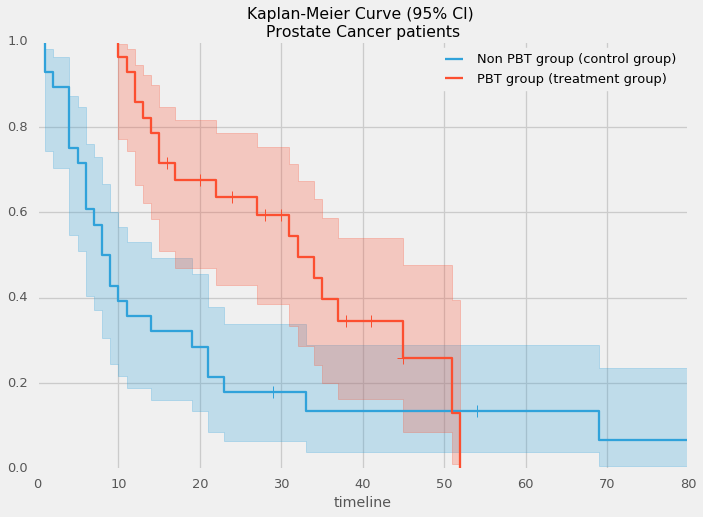

In [36]:
ax = kmfcontrol.plot(show_censors=True)
kmftreatment.plot(ax=ax, show_censors=True)
#kmfpop.plot(ax=ax, show_censors=True)
plt.title("Kaplan-Meier Curve (95% CI) \nProstate Cancer patients");
plt.savefig('lungkm.pdf')

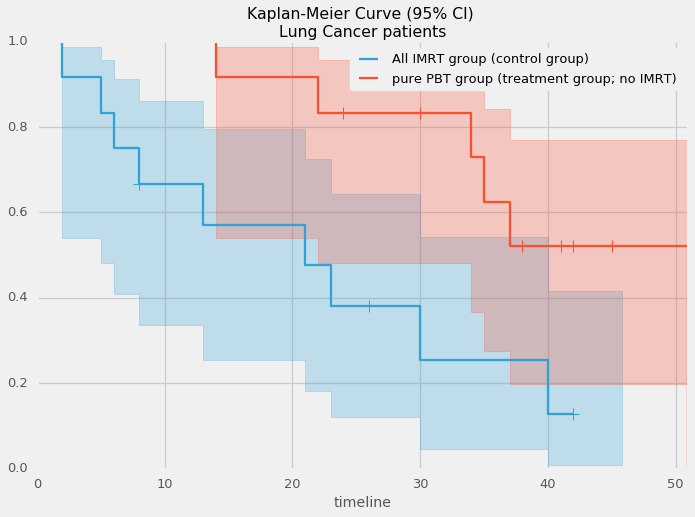

In [37]:
ax = kmfpurecontrol.plot(show_censors=True)
kmfpuretreatment.plot(ax=ax, show_censors=True)
#kmfpop.plot(ax=ax, show_censors=True)
plt.title("Kaplan-Meier Curve (95% CI) \nLung Cancer patients");
plt.savefig('lungkm_pure.pdf')

In [38]:
from lifelines.statistics import logrank_test
results = logrank_test(Tpuretreatment, Tpurecontrol, Epuretreatment, Epurecontrol)
results.print_summary()

Results
   alpha: 0.95
   null distribution: chi squared
   test: logrank
   df: 1
   t 0: -1

   __ p-value ___|__ test statistic __|____ test result ____|__ is significant __
         0.01650 |              5.749 |      Reject Null    |        True       
